In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
df = pd.read_json('../Data2.json')
df.sort_index(inplace=True)

## Casting string to float

In [71]:
df['bachelorsAvg']=df['bachelorsAvg'].apply(pd.to_numeric, errors='coerce')
df['masterAvg']=df['masterAvg'].apply(pd.to_numeric, errors='coerce')

#### Doc about pandas.to_numeric

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

errors =‘coerce’,  invalid parsing will be set as NaN

## Overall view of situation

### Bachelors

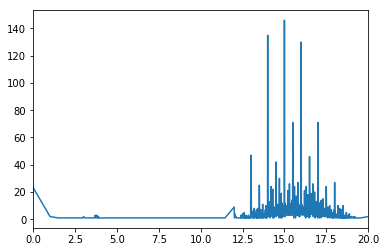

In [72]:
df['bachelorsAvg'].value_counts().sort_index().plot(xlim=(0,20))
plt.show()

In [73]:
myBins=[df['bachelorsAvg'].min(),0,4,5,10,20,df['bachelorsAvg'].max()]
avg = pd.cut(df['bachelorsAvg'], myBins) 
avg.value_counts()

(10, 20]       3454
(0, 4]           34
(-14, 0]         23
(20, 18050]      10
(5, 10]           2
(4, 5]            2
Name: bachelorsAvg, dtype: int64

In [74]:
df[df['bachelorsAvg']<=6].country.value_counts()

آمریکا      29
n/a          9
کانادا       5
استرالیا     5
آلمان        3
سوئد         2
سنگاپور      1
انگلستان     1
فنلاند       1
بلژیک        1
نیوزلند      1
اتریش        1
فرانسه       1
Name: country, dtype: int64

### Masters

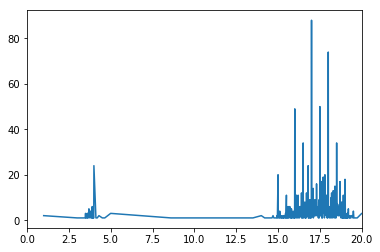

In [75]:
df['masterAvg'].value_counts().sort_index().plot(xlim=(0,20))
plt.show()

In [76]:
df['masterAvg'].describe()

count    1823.000000
mean       18.361791
std        43.007922
min         1.000000
25%        16.500000
50%        17.400000
75%        18.125000
max      1820.000000
Name: masterAvg, dtype: float64

In [77]:
myBins2=[0,4,6,10,20,df['masterAvg'].max()]
avg = pd.cut(df['masterAvg'], myBins2)
avg.value_counts()

(10, 20]      1688
(0, 4]         100
(20, 1820]      24
(4, 6]          10
(6, 10]          1
Name: masterAvg, dtype: int64

## Converting GermanyGPA to Iranian Gpa
#### based on https://www.visamondial.com/تبدیل-معدل-یا-نمره-به-سیستم-آلمانی/

In [78]:
df[((df.masterAvg<=6)|(df.bachelorsAvg<=6)) & (df.country==u"آلمان")].count()[0]

8

In [79]:
def germanGPA_to_iranGPA(g):
    return 10*(g-1/3)-20

In [80]:
df[(df.masterAvg<=6) & (df.country==u"آلمان")].masterAvg=germanGPA_to_iranGPA(df[(df.masterAvg<=6) & (df.country==u"آلمان")].masterAvg)

In [81]:
df[(df.bachelorsAvg<=6) & (df.country==u"آلمان")].bachelorsAvg=germanGPA_to_iranGPA(df[(df.bachelorsAvg<=6) & (df.country==u"آلمان")].bachelorsAvg)

## Converting to GPA 0-4

#### About the GPA Calculator

Based of http://www.foreigncredits.com/resources/gpa-calculator/iran

In [82]:
#methods
import math
def round_to(number,roundto):
    return math.floor(number / roundto) * roundto
def toGPA(iscore): #to GPA [0,4]
    return round_to((float)(iscore-10)/2,0.5)

In [83]:
x=df['bachelorsAvg'].copy()
for i in x.index:
    if (x[i]>10) & (x[i]<=20):x[i]=toGPA(x[i])
df['bachelorsAvg']=x
pd.cut(x, myBins).value_counts()

(0, 4]         3463
(4, 5]           27
(-14, 0]         23
(20, 18050]      10
(5, 10]           2
(10, 20]          0
Name: bachelorsAvg, dtype: int64

In [84]:
x=df['masterAvg'].copy()
for i in x.index:
    if (x[i]>10) & (x[i]<=20):x[i]=toGPA(x[i])
df['masterAvg']=x
pd.cut(df['masterAvg'], myBins2).value_counts()

(0, 4]        1705
(4, 6]          93
(20, 1820]      24
(6, 10]          1
(10, 20]         0
Name: masterAvg, dtype: int64

## Outliers to NAN

## bachelorsAvg

In [85]:
(df[df['bachelorsAvg']==0]['bachelorsAvg']).count()

23

In [86]:
df.ix[df.bachelorsAvg>5, 'bachelorsAvg'] 

7           7.67
1480       10.00
1685     1660.00
1876    18050.00
2088       22.00
2191    10000.00
2352       99.00
3292       64.00
3384     1450.00
3588       70.12
3744     9999.00
4132     1304.00
Name: bachelorsAvg, dtype: float64

** These data don't make sense so we are going to fill them with Null value**

In [87]:
df.ix[df.bachelorsAvg==0, 'bachelorsAvg'] = np.nan
df.ix[df.bachelorsAvg>5, 'bachelorsAvg'] = np.nan

In [88]:
pd.cut(df['bachelorsAvg'], myBins).value_counts()

(0, 4]         3463
(4, 5]           27
(20, 18050]       0
(10, 20]          0
(5, 10]           0
(-14, 0]          0
Name: bachelorsAvg, dtype: int64

In [89]:
df.ix[df.bachelorsAvg>4, 'bachelorsAvg'].value_counts()

4.5    24
5.0     2
4.6     1
Name: bachelorsAvg, dtype: int64

In [90]:
# GPA scale 0-5
# in this scale 5==4 in 0-4 scale
# and 4.5==3.6 in 0-4 scale
df.ix[df.bachelorsAvg==5, 'bachelorsAvg'] = 4
df.ix[df.bachelorsAvg>=4.5, 'bachelorsAvg'] = 3.6

In [91]:
pd.cut(df['bachelorsAvg'], myBins).value_counts()

(0, 4]         3490
(20, 18050]       0
(10, 20]          0
(5, 10]           0
(4, 5]            0
(-14, 0]          0
Name: bachelorsAvg, dtype: int64

## masterAvg

In [92]:
pd.cut(df['masterAvg'], myBins2).value_counts()

(0, 4]        1705
(4, 6]          93
(20, 1820]      24
(6, 10]          1
(10, 20]         0
Name: masterAvg, dtype: int64

In [93]:
df[df['masterAvg']>20]['masterAvg']

43        66.0
157       94.0
257       85.0
349       97.2
367       88.0
375       74.0
1197      69.0
1332     110.0
1550      78.0
1659      96.0
1667      60.0
1830      92.0
1842      60.0
1975      96.0
2123      87.0
2192      62.0
2616      90.0
2819      69.0
2856      72.0
3262     108.0
3384    1820.0
3924      80.0
4220      68.0
4243      80.0
Name: masterAvg, dtype: float64

In [94]:
df.ix[[3384,3262,1332],'masterAvg']=np.nan #remove out of range records

### Convert 100 scale gpa to 4.0

based of : http://www.collegeboard.com/html/academicTracker-howtoconvert.html

In [95]:
def togpa(iscore,binss):
    return pd.cut(iscore, bins=binss,labels=np.arange(1,5))
avg=df[(df['masterAvg']>50) & (df['masterAvg']<=100)]['masterAvg']
x=togpa(avg,[60,72,79,89,100])
df.ix[(df['masterAvg']>50) & (df['masterAvg']<=100),'masterAvg']=x
pd.concat([x,avg],axis=1).head(7)

,masterAvg,masterAvg
43,1,66.0
157,4,94.0
257,3,85.0
349,4,97.2
367,3,88.0
375,2,74.0
1197,1,69.0


In [96]:
df.ix[df.masterAvg>5, 'masterAvg'] = np.nan
df.ix[df.masterAvg==5, 'masterAvg'] = 4

In [97]:
df[df['masterAvg']>4]['masterAvg'].value_counts()

4.50    81
4.30     2
4.65     1
4.60     1
4.20     1
4.12     1
Name: masterAvg, dtype: int64

In [98]:
df.ix[df.masterAvg>4, 'masterAvg'] = 3.5

In [99]:
pd.cut(df['masterAvg'], myBins2).value_counts()

(0, 4]        1817
(20, 1820]       0
(10, 20]         0
(6, 10]          0
(4, 6]           0
Name: masterAvg, dtype: int64

# PLOT

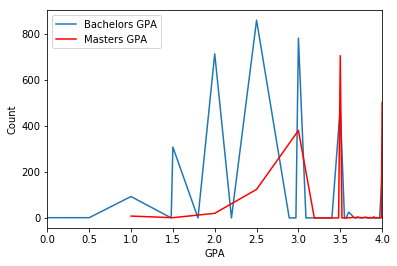

In [100]:
df.bachelorsAvg.value_counts().sort_index().plot(xlim=(0,4))
df.masterAvg.value_counts().sort_index().plot(xlim=(0,4),c='r')
plt.legend(loc = 1)
plt.legend(['Bachelors GPA', 'Masters GPA'], loc = 2)
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

## Saving data

In [101]:
df.rename(columns={'masterAvg': 'gpaMasters','bachelorsAvg':'gpaBachelors'}, inplace=True)
df.to_json('Data_FixedGPA.json',date_format='utf8')